### PART - A

DOMAIN: Digital content and entertainment industry
    
    
CONTEXT: The objective of this project is to build a text classification model that analyses the customer's
sentiments based on their reviews in the IMDB database. The model uses a complex deep learning model to build
an embedding layer followed by a classification algorithm to analyse the sentiment of the customers.


DATA DESCRIPTION: The Dataset of 50,000 movie reviews from IMDB, labelled by sentiment (positive/negative).
Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For
convenience, the words are indexed by their frequency in the dataset, meaning the for that has index 1 is the most
frequent word. Use the first 20 words from each review to speed up training, using a max vocabulary size of
10,000. As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.


PROJECT OBJECTIVE: To Build a sequential NLP classifier which can use input text parameters to determine the
customer sentiments.

## Steps and tasks: [ Total Score: 30 Marks]

### 1. Import and analyse the data set. [5 Marks]
Hint: - Use `imdb.load_data()` method
 - Get train and test set
 - Take 10000 most frequent words


In [1]:
# Import packages
import pandas as pd, numpy as np
import tensorflow as tf
assert tf.__version__ >= '2.0'
import seaborn as sns
from itertools import islice

# Keras
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, MaxPooling1D, Conv1D,Bidirectional,GlobalMaxPool1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.initializers import Constant
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping,ReduceLROnPlateau,TensorBoard

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
random_state = 42
np.random.seed(random_state)
tf.random.set_seed(random_state)

In [2]:
vocab_size = 10000
maxlen = 300
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = vocab_size)

Distributon of positive and negative sentiment
------------------------------------------------------------
In Training data,
Negative sentiments are 12500 and
Positive sentiments are 12500


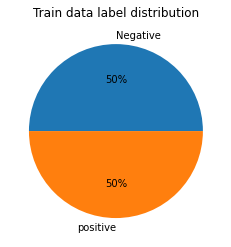

In [3]:
 print('Distributon of positive and negative sentiment'); print('--'*30)
ar_unique, i = np.unique(y_train, return_counts=True)
print("In Training data,\nNegative sentiments are",i[0],"and\nPositive sentiments are",i[1])
plt.title('Train data label distribution')
_ =plt.pie(i, autopct = '%.0f%%', labels = ['Negative','positive'])




In Training data,
Negative sentiments are 12500 and
positive sentiments are 12500


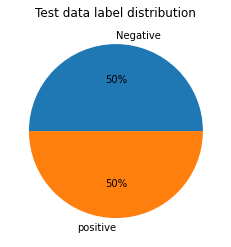

In [4]:
ar_unique, i = np.unique(y_test, return_counts=True)
print("In Training data,\nNegative sentiments are",i[0],"and\npositive sentiments are",i[1])
plt.title('Test data label distribution')
_ =plt.pie(i, autopct = '%.0f%%', labels = [ 'Negative','positive'])

### 2. Perform relevant sequence adding on the data. [5 Marks]


In [5]:
x_train = pad_sequences(x_train, maxlen = maxlen, padding = 'pre')
x_test =  pad_sequences(x_test, maxlen = maxlen, padding = 'pre')

X = np.concatenate((x_train, x_test), axis = 0)
y = np.concatenate((y_train, y_test), axis = 0)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state, shuffle = True)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2, random_state = random_state, shuffle = True)

### 3. Perform following data analysis: [5 Marks]
• Print shape of features and labels
• Print value of any one feature and it's label


In [6]:
print('---'*20, f'\nNumber of rows in training dataset: {x_train.shape[0]}')
print(f'Number of columns in training dataset: {x_train.shape[1]}')
print(f'Number of unique words in training dataset: {len(np.unique(np.hstack(x_train)))}')


print('---'*20, f'\nNumber of rows in validation dataset: {x_valid.shape[0]}')
print(f'Number of columns in validation dataset: {x_valid.shape[1]}')
print(f'Number of unique words in validation dataset: {len(np.unique(np.hstack(x_valid)))}')


print('---'*20, f'\nNumber of rows in test dataset: {x_test.shape[0]}')
print(f'Number of columns in test dataset: {x_test.shape[1]}')
print(f'Number of unique words in test dataset: {len(np.unique(np.hstack(x_test)))}')


print('---'*20, f'\nUnique Categories: {np.unique(y_train), np.unique(y_valid), np.unique(y_test)}')

------------------------------------------------------------ 
Number of rows in training dataset: 32000
Number of columns in training dataset: 300
Number of unique words in training dataset: 9999
------------------------------------------------------------ 
Number of rows in validation dataset: 8000
Number of columns in validation dataset: 300
Number of unique words in validation dataset: 9984
------------------------------------------------------------ 
Number of rows in test dataset: 10000
Number of columns in test dataset: 300
Number of unique words in test dataset: 9995
------------------------------------------------------------ 
Unique Categories: (array([0, 1], dtype=int64), array([0, 1], dtype=int64), array([0, 1], dtype=int64))


In [7]:
print("Feature value X:", x_train[0])
print("_"*70)
print("label y :", y_train[0])


Feature value X: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    1    4   64  614   96    8  358   14  509    9    8 4040  129
  419  429    4 1513 1741   49 6177    2    7    4 1224  387    6  762
    7  129 1224 7851  783    5  280   25   26 8394 2985 3000  382   95
   25  238  358   14   22   10   10    4   64 1907 1698   16    4   65
  200    2    5 6958 7767   16  321   11    4  217    7    4 7212 2658
    5   38   16    4 8145  250  382   48   36   62   28 1075    4  226
   20   23   68    2   11 2853    5   89   36  853  809   11  119   62
   28   93   12    6   76   53  737   22   10   10    4   64  282   13
  520   12    6  342  675    9   88    7    2    5   27 1256

In [8]:
w2i = imdb.get_word_index()   
print('word index of Fawn is ',w2i['fawn'])

word index of Fawn is  34701


### 4. Decode the feature value to get original sentence [5 Marks]


In [9]:
def decode_review(x, y):
    w2i = imdb.get_word_index()                                
    w2i = {k:(v + 3) for k, v in w2i.items()}
    i2w = {i: w for w, i in w2i.items()}
    i2w[0]= ""
    i2w[1]= ""
    i2w[2]= ""
    #print(i2w[34701])
    ws = (' '.join(i2w[i] for i in x))
    print(f'Review: {ws}')
    print(f'Actual Sentiment: {y}')
    return w2i, i2w

w2i, i2w = decode_review(x_train[0], y_train[0])

# get first 50 key, value pairs from id to word dictionary
print('---'*30, '\n', list(islice(i2w.items(), 0, 50)))

Review:                                                                         the only possible way to enjoy this flick is to bang your head against the wall allow some internal  of the brain let a bunch of your brain cells die and once you are officially mentally retarded perhaps then you might enjoy this film br br the only saving grace was the story between  and stephanie govinda was excellent in the role of the cab driver and so was the brit girl perhaps if they would have created the whole movie on their  in india and how they eventually fall in love would have made it a much more enjoyable film br br the only reason i gave it a 3 rating is because of  and his ability as an actor when it comes to comedy br br   and anil kapoor were wasted needlessly plus the scene at  of the re union was just too much to  being an international  in the post 9 11 world anil kapoor would have got himself shot much before he even reached the sky bridge to  his true love but then again the point of 

### 5. Design, train, tune and test a sequential model. [5 Marks]


In [10]:
model = Sequential()
model.add(Embedding(vocab_size, 256, input_length = maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(256, 5, padding = 'same', activation = 'relu', strides = 1))
model.add(Conv1D(128, 5, padding = 'same', activation = 'relu', strides = 1))
model.add(MaxPooling1D(pool_size = 2))
model.add(Conv1D(64, 5, padding = 'same', activation = 'relu', strides = 1))
model.add(MaxPooling1D(pool_size = 2))
model.add(LSTM(75))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())

# Adding callbacks
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 0)  
mc = ModelCheckpoint('imdb_model.h5', monitor = 'val_loss', mode = 'min', save_best_only = True, verbose = 1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 300, 256)          2560000   
_________________________________________________________________
dropout (Dropout)            (None, 300, 256)          0         
_________________________________________________________________
conv1d (Conv1D)              (None, 300, 256)          327936    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 300, 128)          163968    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 150, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 150, 64)           41024     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 75, 64)            0

In [11]:
# Fit the model
history= model.fit(x_train, y_train, validation_data = (x_valid, y_valid), epochs = 10, batch_size = 64, verbose = True, callbacks = [es, mc])

# Evaluate the model
scores = model.evaluate(x_test, y_test, batch_size = 64)
print('Test accuracy: %.2f%%' % (scores[1]*100))

Epoch 1/10
500/500 [==============================] - ETA: 0s - loss: 0.3411 - accuracy: 0.8391
Epoch 00001: val_loss improved from inf to 0.25066, saving model to imdb_model.h5
500/500 [==============================] - 566s 1s/step - loss: 0.3411 - accuracy: 0.8391 - val_loss: 0.2507 - val_accuracy: 0.8965
Epoch 2/10
500/500 [==============================] - ETA: 0s - loss: 0.1832 - accuracy: 0.9311
Epoch 00002: val_loss did not improve from 0.25066
500/500 [==============================] - 487s 974ms/step - loss: 0.1832 - accuracy: 0.9311 - val_loss: 0.2574 - val_accuracy: 0.8926
Epoch 00002: early stopping
157/157 [==============================] - 27s 173ms/step - loss: 0.2539 - accuracy: 0.8963
Test accuracy: 89.63%


In [12]:
y_pred = model.predict_classes(x_test)
print(f'Classification Report:\n{classification_report(y_pred, y_test)}')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      5333
           1       0.86      0.93      0.89      4667

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



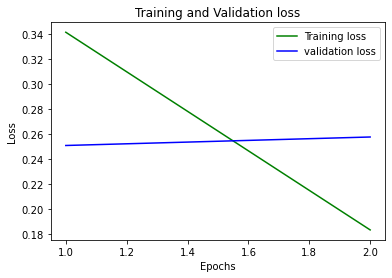

In [13]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,3)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

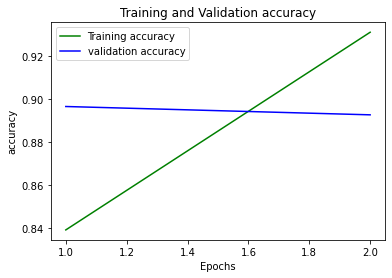

In [14]:
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
epochs = range(1,3)
plt.plot(epochs, accuracy_train, 'g', label='Training accuracy')
plt.plot(epochs, accuracy_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

### 6. Use the designed model to print the prediction on any one sample. [5 Marks]

In [15]:
sample =1000
decode_review(x_test[sample], y_test[sample])
print(f'Predicted sentiment: {y_pred[sample][0]}')

Review:                                                                                                                                                                               i wasn't alive in the 60's so i can't guarantee that this movie was a completely accurate representation of the period but it is certainly a moving and fulfilling experience there are some excellent performances most notably by josh hamilton of with  jerry   who play brothers divided by the war bill  a character actor who has been long ignored by many gives a heart filled performance as their strict father who is forced to question his own beliefs and values as one of his sons makes him proud by going to vietnam but returns empty inside while the other is exactly the opposite all in all this is a powerful and heartwarming film that i hope everyone gets a chance to experience
Actual Sentiment: 1
Predicted sentiment: 1


In [16]:
sample =1
decode_review(x_test[sample], y_test[sample])
print(f'Predicted sentiment: {y_pred[sample][0]}')

Review:                                                                        overall this movie is dreadful and should have never been made one of the problems with this movie is that there is no link to the audience and the characters for example if she is about to be attacked you want to feel oh my god no but you don't in this case you don't care because there is no link that has been made to know the character in the trailer it seemed as though the movie would be great yet there is no suspense what so ever really there could have been maybe some mystery but there is not all she has is a  was said on the dvd's back you would think that it was carefully planned this movie and cleverly made but it is not the ending was just awful very straight forward and pointless too the acting is either average or below average maybe even lower in my opinion it was a waste of an hour of my life the special effects and sets were average too nothing special what so ever there is not much gore or blo

### PART - B


### DOMAIN: Social media analytics
    
    
• CONTEXT: Past studies in Sarcasm Detection mostly make use of Twitter datasets collected using hashtag based
supervision but such datasets are noisy in terms of labels and language. Furthermore, many tweets are replies to
other tweets and detecting sarcasm in these requires the availability of contextual tweets.In this hands-on project,
the goal is to build a model to detect whether a sentence is sarcastic or not, using Bidirectional LSTMs.

• DATA DESCRIPTION:
The dataset is collected from two news websites, theonion.com and huffingtonpost.com.
This new dataset has the following advantages over the existing Twitter datasets:
Since news headlines are written by professionals in a formal manner, there are no spelling mistakes and informal usage. This
reduces the sparsity and also increases the chance of finding pre-trained embeddings.
Furthermore, since the sole purpose of TheOnion is to publish sarcastic news, we get high-quality labels with much less noise as
compared to Twitter datasets.
Unlike tweets that reply to other tweets, the news headlines obtained are self-contained. This would help us in teasing apart the
real sarcastic elements
Content: Each record consists of three attributes:
is_sarcastic: 1 if the record is sarcastic otherwise 0
headline: the headline of the news article
article_link: link to the original news article. Useful in collecting supplementary data
 
Reference: https://github.com/rishabhmisra/News-Headlines-Dataset-For-Sarcasm-Detection
        
        
PROJECT OBJECTIVE: Build a sequential NLP classifier which can use input text parameters to determine the
customer sentiments.

## Steps and tasks: [ Total Score: 30 Marks]
### 1. Read and explore the data [3 Marks]


In [17]:

data = pd.read_json('Sarcasm_Headlines_Dataset.json', lines = True)
print(data.shape)
display(data.head())


(26709, 3)


,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [18]:
print('Value Counts for `is_sarcastic` label'); print('--'*30)
data.is_sarcastic.value_counts()

Value Counts for `is_sarcastic` label
------------------------------------------------------------


0    14985
1    11724
Name: is_sarcastic, dtype: int64

Distributon of `is_sarcastic` label
------------------------------------------------------------


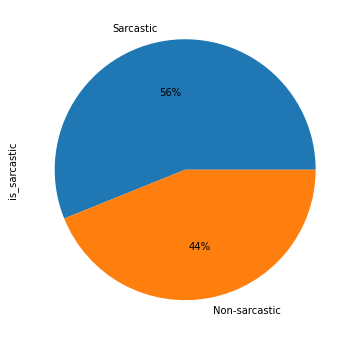

In [19]:
 print('Distributon of `is_sarcastic` label'); print('--'*30)
_ = data['is_sarcastic'].value_counts().plot(kind = 'pie', autopct = '%.0f%%', labels = ['Sarcastic', 'Non-sarcastic'], figsize = (10, 6))


In [20]:
print('Analysis of `is_sarcastic` label by news website'); print('--'*30)

hf = data[data['article_link'].str.contains('huffingtonpost.com')].shape[0]
op = data[data['article_link'].str.contains('theonion.com')].shape[0]

is_sarcastic_hf = data.loc[(data['article_link'].str.contains('huffingtonpost.com')) & (data['is_sarcastic'] == 1)].shape[0]
not_sarcastic_hf = data.loc[(data['article_link'].str.contains('huffingtonpost.com')) & (data['is_sarcastic'] == 0)].shape[0]

is_sarcastic_op = data.loc[(data['article_link'].str.contains('theonion.com')) & (data['is_sarcastic'] == 1)].shape[0]
not_sarcastic_op = data.loc[(data['article_link'].str.contains('theonion.com')) & (data['is_sarcastic'] == 0)].shape[0]

display(pd.DataFrame([[is_sarcastic_hf, is_sarcastic_op], [not_sarcastic_hf, not_sarcastic_op]], 
                     columns = ['huffingtonpost', 'theonion'], index = ['Sarcastic', 'Non-sarcastic']))

Analysis of `is_sarcastic` label by news website
------------------------------------------------------------


,huffingtonpost,theonion
Sarcastic,0,11724
Non-sarcastic,14985,1


In [21]:
# Checking 5 random headlines and labels from the data
import random
print('--'*30); print('Checking 5 random headlines and labels from the data'); print('--'*30)
rands = random.sample(range(1, data.shape[0]), 5)
headlines, labels = list(data.loc[rands, 'headline']), list(data.loc[rands, 'is_sarcastic'])

_ = [print(f'Headline: {head}\nlabel: {label}\n') for head, label in zip(headlines, labels)]


     

------------------------------------------------------------
Checking 5 random headlines and labels from the data
------------------------------------------------------------
Headline: presidential primaries
label: 0

Headline: wealthiest americans ominously remind nation they could easily drop another $10 billion on election
label: 1

Headline: congressman calls trump 'an idiot' for using egypt mosque attack to promote border wall
label: 0

Headline: west bank rioting shatters 45 minutes of middle east peace
label: 1

Headline: meet the megadonor behind the lgbtq rights movement
label: 0



## Insights
    44% of the data have sarcastic labels whereas 56% don't.

    There are no headlines from HuffPost that are sarcastic whereas all but one from The Onion are sarcastic.
    
    Based on some random headlines seen above, it appears that the data is mostly lower-cased. Pre-processing such as removing punctuations and lemmatization can be used.
    
    There are digits in the headlines for e.g. 3 things i needed to hear when i weighed 300 pounds where removing the digits wouldn't help.

### 2. Retain relevant columns [3 Marks]



In [22]:
print('Dropping `article_link` from the data'); print('--'*30)
data.drop('article_link', axis = 1, inplace = True)

Dropping `article_link` from the data
------------------------------------------------------------


In [23]:
from nltk.stem import WordNetLemmatizer
def lem(text):
    lemmatizer = WordNetLemmatizer()
    new=lemmatizer.lemmatize(text)
    return new

In [24]:
import re
print('--'*30); print('Converting headlines to lower case')
data['cleaned_headline'] = data['headline'].apply(lambda x : x.lower())

print('Removing punctuations')
data['cleaned_headline'] = data['cleaned_headline'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

print('Applying Lemmatizer')
data['cleaned_headline'] = data['cleaned_headline'].apply(lambda x: lem(x))

print('Removing multiple spaces between words')
data['cleaned_headline'] = data['cleaned_headline'].apply(lambda x: re.sub(' +', ' ', x))

------------------------------------------------------------
Converting headlines to lower case
Removing punctuations
Applying Lemmatizer
Removing multiple spaces between words


### 3. Get length of each sentence [3 Marks]


In [25]:
print('--'*40); print('Get the length of each line, find the maximum length and print the maximum length line'); 
print('Length of line ranges from 7 to 241.'); print('--'*40)
# Get length of each line
data['line_length'] = data['cleaned_headline'].str.len()

print('Minimum line length: {}'.format(data['line_length'].min()))
print('Maximum line length: {}'.format(data['line_length'].max()))
print('Line with maximum length: {}'.format(data[data['line_length'] == data['line_length'].max()]['cleaned_headline'].values[0]))

--------------------------------------------------------------------------------
Get the length of each line, find the maximum length and print the maximum length line
Length of line ranges from 7 to 241.
--------------------------------------------------------------------------------
Minimum line length: 7
Maximum line length: 237
Line with maximum length: maya angelou poet author civil rights activist andholy cowtony awardnominated actress college professor magazine editor streetcar conductorreally streetcar conductor wowcalypso singer nightclub performer and foreign journalist dead at 86


In [26]:
print('--'*40); print('Get the number of words, find the maximum number of words and print the maximum number of words'); 
print('Number of words ranges from 2 to 39.'); print('--'*40)
# Get length of each line
data['nb_words'] = data['cleaned_headline'].apply(lambda x: len(x.split(' ')))

print('Minimum number of words: {}'.format(data['nb_words'].min()))
print('Maximum number of words: {}'.format(data['nb_words'].max()))
print('Line with maximum number of words: {}'.format(data[data['nb_words'] == data['nb_words'].max()]['cleaned_headline'].values[0]))


--------------------------------------------------------------------------------
Get the number of words, find the maximum number of words and print the maximum number of words
Number of words ranges from 2 to 39.
--------------------------------------------------------------------------------
Minimum number of words: 2
Maximum number of words: 39
Line with maximum number of words: elmore leonard modern prose master noted for his terse prose style and for writing about things perfectly and succinctly with a remarkable economy of words unfortunately and sadly expired this gloomy tuesday at the age of 87 years old


### 4. Define parameters [3 Marks]


In [27]:
max_features = 10000
maxlen = data['nb_words'].max()
embedding_size = 200




### 5. Get indices for words [3 Marks]


In [28]:
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(list(data['cleaned_headline']))
tokenizer.word_index

### 6. Create features and labels [3 Marks]


In [29]:
X = tokenizer.texts_to_sequences(data['cleaned_headline'])
X = pad_sequences(X, maxlen = maxlen)
y = np.asarray(data['is_sarcastic'])

print(f'Number of Samples: {len(X)}')
print(f'Number of Labels: {len(y)}')
print(f'\nFirst headline:\n{X[0]}\n\nLabel of the first headline: {y[0]}')

Number of Samples: 26709
Number of Labels: 26709

First headline:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  293  795 3551 2241   47  359   92 2138    5 2509 8285]

Label of the first headline: 0


### 7. Get vocabulary size [3 Marks]


In [30]:
w2i = tokenizer.word_index
vocab_size = len(w2i) + 1
print(f'Number of unique tokens: {vocab_size}')


Number of unique tokens: 28407


### 8. Create a weight matrix using GloVe embeddings [3 Marks]


In [31]:
glove_file = 'glove.6B.zip'
#Extract Glove embedding zip file
from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
    z.extractall()
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE, encoding='utf-8'):
    word = o.split(' ')[0]
    embd = o.split(' ')[1:]
    embd = np.asarray(embd, dtype = 'float32')
    embeddings[word] = embd
# Getting the minimum number of words
num_words = min(max_features, vocab_size) + 1

embedding_matrix = np.zeros((num_words, embedding_size))
for word, i in tokenizer.word_index.items():
    if i > max_features: continue
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())



400000

### 9. Define and compile a Bidirectional LSTM model. [3 Marks]

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = random_state, shuffle = True)

print('---'*20, f'\nNumber of rows in training dataset: {x_train.shape[0]}')
print(f'Number of columns in training dataset: {x_train.shape[1]}')
print(f'Number of unique words in training dataset: {len(np.unique(np.hstack(x_train)))}')

print('---'*20, f'\nNumber of rows in test dataset: {x_test.shape[0]}')
print(f'Number of columns in test dataset: {x_test.shape[1]}')
print(f'Number of unique words in test dataset: {len(np.unique(np.hstack(x_test)))}')


------------------------------------------------------------ 
Number of rows in training dataset: 21367
Number of columns in training dataset: 39
Number of unique words in training dataset: 9984
------------------------------------------------------------ 
Number of rows in test dataset: 5342
Number of columns in test dataset: 39
Number of unique words in test dataset: 7764


In [33]:
model = Sequential()
model.add(Embedding(num_words, embedding_size, embeddings_initializer = Constant(embedding_matrix), input_length = maxlen, trainable = False))
model.add(Bidirectional(LSTM(128, return_sequences = True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5, input_shape = (256,)))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5, input_shape = (128,)))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5, input_shape = (64,)))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Adding callbacks
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)  
mc = ModelCheckpoint('sarcasm_detector.h5', monitor = 'val_loss', mode = 'min', save_best_only = True, verbose = 1)
lr_r = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 5),
logdir = 'log'; tb = TensorBoard(logdir, histogram_freq = 1)
callbacks = [es, mc, lr_r, tb]

print(model.summary())



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 39, 200)           2000200   
_________________________________________________________________
bidirectional (Bidirectional (None, 39, 256)           336896    
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

### 10. Fit the model and check the validation accuracy [3 Marks]

In [34]:
batch_size = 100
epochs = 3

h = model.fit(x_train, y_train, epochs = epochs, validation_split = 0.2, batch_size = batch_size, verbose = 2, callbacks = callbacks)


Epoch 1/3

Epoch 00001: val_loss improved from inf to 0.45839, saving model to sarcasm_detector.h5
171/171 - 27s - loss: 0.6064 - accuracy: 0.6548 - val_loss: 0.4584 - val_accuracy: 0.7911 - lr: 0.0010
Epoch 2/3

Epoch 00002: val_loss improved from 0.45839 to 0.38127, saving model to sarcasm_detector.h5
171/171 - 26s - loss: 0.4533 - accuracy: 0.7964 - val_loss: 0.3813 - val_accuracy: 0.8315 - lr: 0.0010
Epoch 3/3

Epoch 00003: val_loss improved from 0.38127 to 0.35436, saving model to sarcasm_detector.h5
171/171 - 27s - loss: 0.3771 - accuracy: 0.8385 - val_loss: 0.3544 - val_accuracy: 0.8451 - lr: 0.0010


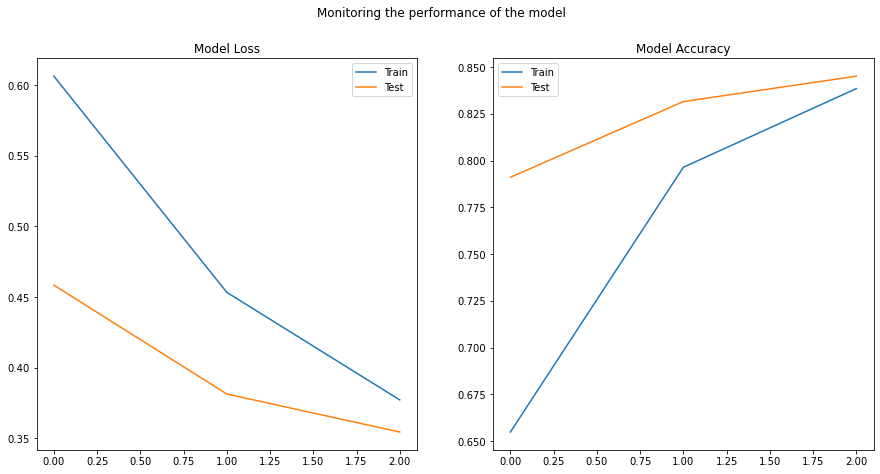

In [35]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7.2))
f.suptitle('Monitoring the performance of the model')

ax1.plot(h.history['loss'], label = 'Train')
ax1.plot(h.history['val_loss'], label = 'Test')
ax1.set_title('Model Loss')
ax1.legend(['Train', 'Test'])

ax2.plot(h.history['accuracy'], label = 'Train')
ax2.plot(h.history['val_accuracy'], label = 'Test')
ax2.set_title('Model Accuracy')
ax2.legend(['Train', 'Test'])

plt.show()


In [36]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test, verbose = 0)
print('Overall Accuracy: {}'.format(round(accuracy * 100, 0)))


Overall Accuracy: 84.0


In [37]:
y_pred = (model.predict(x_test) > 0.5).astype('int32')
print(f'Classification Report:\n{classification_report(y_pred, y_test)}')


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      2987
           1       0.83      0.82      0.82      2355

    accuracy                           0.84      5342
   macro avg       0.84      0.84      0.84      5342
weighted avg       0.84      0.84      0.84      5342



------------------------------------------------------------
Confusion Matrix


,Non-sarcastic,Sarcastic
Non-sarcastic,2577,419
Sarcastic,410,1936


------------------------------------------------------------


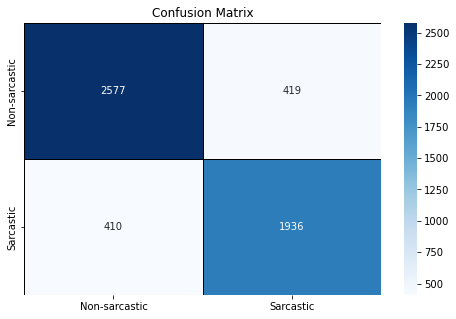

In [38]:
print('--'*30); print('Confusion Matrix')
cm = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm , index = ['Non-sarcastic', 'Sarcastic'] , columns = ['Non-sarcastic','Sarcastic'])
display(cm); print('--'*30)

plt.figure(figsize = (8, 5))
_ = sns.heatmap(cm, cmap= 'Blues', linecolor = 'black' , linewidth = 1 , annot = True, 
            fmt = '' , xticklabels = ['Non-sarcastic', 'Sarcastic'], 
            yticklabels = ['Non-sarcastic', 'Sarcastic']).set_title('Confusion Matrix')
